#### Multinomial classification
=> MNIST 예제를 이용해서 보완해야 하는 부분들을 알아보아요!
=> MNIST 이미지를 학습하고 prediction하는 예제 24 * 24 크기의 이미지가 주어져요!

=> 텐서플로우에서 제공하는 MNIST예제를 이용해서 조금 편하게 작업을 해 볼꺼에요!

24 * 24

=> 요것은 이미지를 데이터 처리하는 것 ? 

#### 이미지 파일을 데이타화 해서 풀어라
##### 딥러닝을 이용해 

#### 캐글을 이용하지 않고 텐서플로우 

In [4]:
# 필요한 모듈 임포트
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# MNIST 데이터 다운로드
# 이미지 파일 데이타 셋이 폴더에 다운로드 받아진다
from tensorflow.examples.tutorials.mnist import input_data
# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)



Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


In [89]:
# Data Loading
mnist.train.images.shape



#  학습할 픽셀(바이트)로 이루어진 이미지 파일 데이타 프레임 된 ?
train_x_data_df = pd.DataFrame(mnist.train.images)

print(train_x_data_df)

train_x_data_df.to_csv("./mnist_x_data.csv", index = False)
# x 데이타의 각 컬럼은 (각 픽셀 값은) 0과 1 사이의 값으로
# 이미 스케일이 되어 있는 상태이다? 
# 0과 가까울수록 흰생을 지칭, 1과 가까울수록 색상이 어두워저요




       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
54995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
0      0

In [100]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
print(mnist.train.num_examples)

55000


In [8]:
# 이제 학습할 라벨 데이터를 데이타 프레임으로 변환시키고 
train_y_data_df = pd.DataFrame(mnist.train.labels)
# csv파일로 만들어요
train_y_data_df.to_csv("./mnist_y_data.csv", index = False)

In [88]:
print(train_y_data_df)

         0    1    2    3    4    5    6    7    8    9
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
54995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
54996  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
54997  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
54998  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
54999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[55000 rows x 10 columns]


In [15]:
# tensorflow로 머신러닝
# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# Hypothesis
logit = tf.matmul(X, W) + b
H = tf.nn.softmax(logit)
# Cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels = Y) )
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session initializatin
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [24]:
# 학습
# 데이터 사이즈를 보고 전체 epoch수를 판단
# epoch수를 많으면 많을 수록 학습의 효과 가 늘어나지만 시간이 너무 걸린다
# 따라서 적절한 epoch수를 결정
train_epoch = 30

# 배치 사이즈를 설정해서 실제 데이터를 몇 개씩 나눠서 학습할 지 생각해준다
batch_size = 100

# 피드 딕트에 X 쪽 이미지 밸류 Y 쪽 이미지 밸류
for step in range(train_epoch):
    
    #  학습용 데이터에서 100개씩 뜯어오는 느낌이다
    num_of_iter = int( mnist.train.num_examples / batch_size )
    cost_val =0
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # X 랑 Y를 batch_x batch_y
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
                                                    Y:batch_y})
    if step % 3 == 0:
        print("Cost value: {}".format(cost_val))
    
    

Cost value: 1.0748836994171143
Cost value: 0.6003679037094116
Cost value: 0.5033334493637085
Cost value: 0.3403369188308716
Cost value: 0.42929571866989136
Cost value: 0.22575248777866364
Cost value: 0.31453514099121094
Cost value: 0.5383284091949463
Cost value: 0.410534143447876
Cost value: 0.37949520349502563


In [ ]:
# 

In [ ]:
# 요 아래는 배치 사이즈를 쓰지않고 학습하지 않았을 떄 

# for step in range(train_epoch):
    
#     #  학습용 데이터에서 100개씩 뜯어오는 느낌이다
#     # X 랑 Y를 batch_x batch_y
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, 
#                                                     Y:mnist.train.labels})
#     if step % 3 == 0:
#         print("Cost value: {}".format(cost_val))

In [95]:
print(mnist.test.images.shape)
print(mnist.test.labels)

(10000, 784)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
# 학습이 종료되었으니 정확도를 측정해야 해요!
# 그런데 정확도가 크게 안나온다 그래도 epoch을 100으로 늘리면 50
# epcch수를 늘리면 늘릴 수록 정확도는 높아지지만 학습 시간이 오래 걸리긴한다


# 확실히 배치 사이즈를 이용했을때 정확도가 확 높아진다. 90정도로
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32) )
print("Accuracy: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})))


Accuracy: 0.9039999842643738


Label: [9]
Predict: [9]


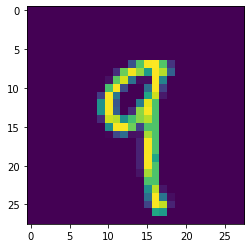

In [87]:
# Prediction
# 랜덤으로 하나의 데이터를 추출해서 그놈을 이용해서 프리딕션을 한 후 결과를 비교해 보아요
# mnist.train.num_examples

# 랜덤변수을 테스트 데이타의 전체 로우 수와 0 사이 구한다
r = np.random.randint(0, mnist.test.num_examples)



# 난수가 의미하는 라벨 값을 먼저 구해봄!
#sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1)) 
print("Label: {}".format(sess.run(tf.argmax(mnist.test.labels[r:r+1], axis=1))))
print("Predict: {}".format(sess.run(tf.argmax(H,1), feed_dict={X:mnist.test.images[r:r+1]}))) #sess.run(tf.argmax(H,1), feed_dict={X:mnist.test.images[r:r+1]})

# mnist.test.images[r:r+1] -> 요게 바로 2차원 배열이다 

# 돌릴 때마다 라벨과 다르게 프리딕트가 예측이 잘 안되는 그게 잇다
plt.imshow(mnist.test.images[r:r+1].reshape(28,28)) # 

# reshape 28 * 28 = 784




In [105]:
print(mnist.test.images[r:r+1].shape)

print(mnist.test.images[0])

(1, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.